# Imports

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns


# Reading and processing data


In [26]:
income_data = pd.read_csv("adult copy.csv", na_values="?")

In [27]:
# income_data.describe()
income_data.info()
income_data.columns = range(len(income_data.columns))

income_data = income_data.dropna()
# income_data.info()

income_data.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23440 entries, 0 to 23439
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             23440 non-null  int64 
 1   workclass       22173 non-null  object
 2   fnlwgt          23440 non-null  int64 
 3   education       23440 non-null  object
 4   education.num   23440 non-null  int64 
 5   marital.status  23440 non-null  object
 6   occupation      22168 non-null  object
 7   relationship    23440 non-null  object
 8   race            23440 non-null  object
 9   sex             23440 non-null  object
 10  capital.gain    23440 non-null  int64 
 11  capital.loss    23440 non-null  int64 
 12  hours.per.week  23440 non-null  int64 
 13  native.country  23018 non-null  object
 14  income          23440 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
1,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
3,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
4,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
5,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
6,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
8,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
9,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
10,57,Private,317847,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,2824,50,United-States,>50K
12,34,Private,203034,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,2824,50,United-States,>50K


In [28]:
# imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# imputer.fit(income_data)
# income_data = imputer.transform(income_data)


<Axes: >

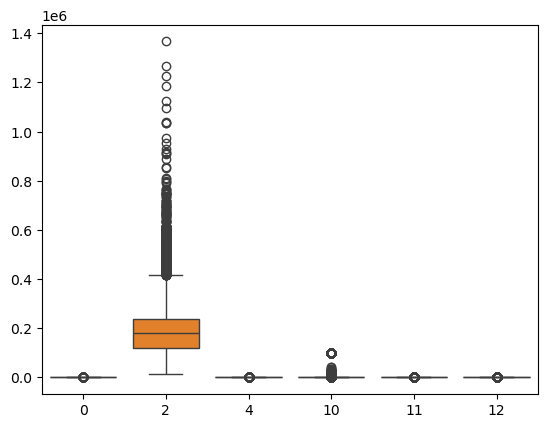

In [29]:
sns.boxplot(income_data)

In [30]:
# income_data = pd.DataFrame(income_data)
income_data.info()
income_data.head(15)
# income_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 21768 entries, 0 to 23439
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       21768 non-null  int64 
 1   1       21768 non-null  object
 2   2       21768 non-null  int64 
 3   3       21768 non-null  object
 4   4       21768 non-null  int64 
 5   5       21768 non-null  object
 6   6       21768 non-null  object
 7   7       21768 non-null  object
 8   8       21768 non-null  object
 9   9       21768 non-null  object
 10  10      21768 non-null  int64 
 11  11      21768 non-null  int64 
 12  12      21768 non-null  int64 
 13  13      21768 non-null  object
 14  14      21768 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.7+ MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
1,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
3,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
4,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
5,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
6,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
8,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
9,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
10,57,Private,317847,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,2824,50,United-States,>50K
12,34,Private,203034,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,2824,50,United-States,>50K


In [31]:
income_data[14].value_counts()

14
<=50K    14262
>50K      7506
Name: count, dtype: int64

In [32]:
le1 = LabelEncoder()
le3 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()
target_label_encoder = LabelEncoder()


income_data[1] = le1.fit_transform(income_data[1])
income_data[3] = le1.fit_transform(income_data[3])
income_data[5] = le1.fit_transform(income_data[5])
income_data[6] = le1.fit_transform(income_data[6])
income_data[7] = le1.fit_transform(income_data[7])
income_data[8] = le1.fit_transform(income_data[8])
income_data[9] = le1.fit_transform(income_data[9])
income_data[13] = le1.fit_transform(income_data[13])
income_data[14] = target_label_encoder.fit_transform(income_data[14])


In [33]:
income_data.head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,74,5,88638,10,16,4,9,2,4,0,0,3683,20,37,1
1,68,0,422013,11,9,0,9,1,4,0,0,3683,40,37,0
3,45,2,172274,10,16,0,9,4,2,0,0,3004,35,37,1
4,38,4,164526,14,15,4,9,1,4,1,0,2824,45,37,1
5,52,2,129177,9,13,6,7,1,4,0,0,2824,20,37,1
6,32,2,136204,12,14,5,3,1,4,1,0,2824,55,37,1
8,46,2,45363,14,15,0,9,1,4,1,0,2824,40,37,1
9,45,2,172822,1,7,0,13,1,4,1,0,2824,76,37,1
10,57,2,317847,12,14,0,3,1,4,1,0,2824,50,37,1
12,34,2,203034,9,13,5,11,1,4,1,0,2824,50,37,1


In [34]:
# sc = StandardScaler()
# income_data.iloc[:,0:14] = sc.fit_transform(income_data.iloc[:,0:14])

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier


X_train, X_test, Y_train, Y_test = train_test_split(income_data.iloc[:,0:14], np.array(income_data[14]), test_size=0.2, shuffle=True)

lr = XGBClassifier()
models = GridSearchCV(lr, param_grid={})
models.fit(X_train, Y_train)
# print(X_train.shape, Y_train.shape)
# model.fit(X_train, Y_train)
model = models.best_estimator_

Accuracy: 0.8350941662838769


<Axes: >

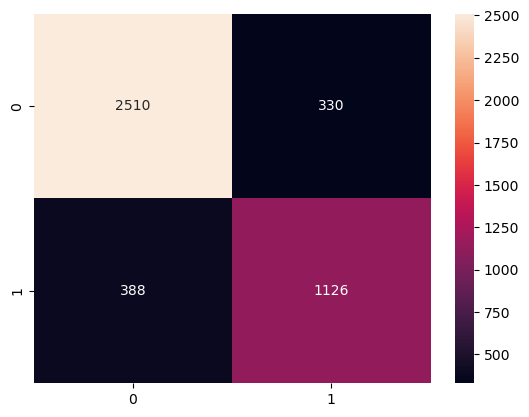

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
cm = confusion_matrix(Y_test, predictions)
print("Accuracy:", score)
sns.heatmap(cm, annot=True, fmt="d")